**EDA - 1**

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving BIKE DETAILS.csv to BIKE DETAILS.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (replace with the correct uploaded file name)
df = pd.read_csv('BIKE DETAILS.csv')
df.head()


name  selling_price  year seller_type  \
0            Royal Enfield Classic 350         175000  2019  Individual   
1                            Honda Dio          45000  2017  Individual   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                Yamaha SZ [2013-2014]          20000  2011  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN  
2  1st owner      12000           148114.0  
3  1st owner      23000            89643.0  
4  2nd owner      21000                NaN

In [ ]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB


name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

**QUESTIONS**

1. What is the range of selling prices in the dataset?

In [ ]:
df['selling_price'].min(), df['selling_price'].max()


(5000, 760000)

2. What is the median selling price for bikes in the dataset?

In [ ]:
df['selling_price'].median()


45000.0

3. What is the most common seller type?

In [ ]:
df['seller_type'].mode()[0]


'Individual'

4. How many bikes have driven more than 50,000 kilometers?

In [ ]:
df[df['km_driven'] > 50000].shape[0]


170

5. What is the average km_driven value for each ownership type?

In [ ]:
df.groupby('owner')['km_driven'].mean()


owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64

6. What proportion of bikes are from the year 2015 or older?

In [ ]:
(df['year'] <= 2015).sum() / len(df)


np.float64(0.5664467483506126)

7. What is the trend of missing values across the dataset?

In [ ]:
df.isnull().sum()


name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

8. What is the highest ex_showroom_price recorded, and for which bike?

In [ ]:
df[['name', 'ex_showroom_price']].dropna().sort_values(by='ex_showroom_price', ascending=False).head(1)


name  ex_showroom_price
134  Harley-Davidson Street Bob          1278000.0

9. What is the total number of bikes listed by each seller type?

In [ ]:
df['seller_type'].value_counts()


seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64

10. What is the relationship between selling_price and km_driven for first-owner bikes?

In [ ]:
first_owner_df = df[df['owner'] == '1st owner']
first_owner_df[['selling_price', 'km_driven']].corr()


selling_price  km_driven
selling_price       1.000000  -0.243482
km_driven          -0.243482   1.000000

11. Identify and remove outliers in the km_driven column using the IQR method.

In [ ]:
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

filtered_df = df[~((df['km_driven'] < (Q1 - 1.5 * IQR)) | (df['km_driven'] > (Q3 + 1.5 * IQR)))]
filtered_df.shape[0]


1022

12. Perform a bivariate analysis to visualize the relationship between year and selling_price.

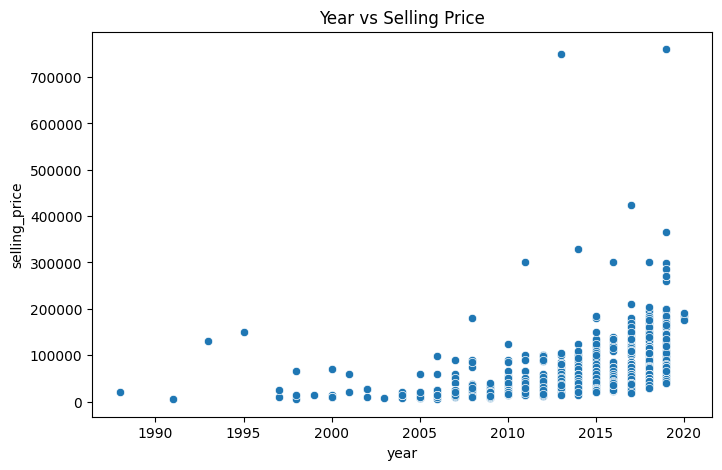

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='year', y='selling_price')
plt.title('Year vs Selling Price')
plt.show()


13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?

In [ ]:
df['bike_age'] = 2025 - df['year']
dep_df = df.dropna(subset=['ex_showroom_price'])
dep_df['depreciation'] = dep_df['ex_showroom_price'] - dep_df['selling_price']
dep_df.groupby('bike_age')['depreciation'].mean()


<ipython-input-18-07e915a845e0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dep_df['depreciation'] = dep_df['ex_showroom_price'] - dep_df['selling_price']


bike_age
5    -34260.000000
6      2954.562500
7     13023.194805
8     22306.082353
9     28328.190476
10    28013.275000
11    34505.606061
12    43086.886792
13    37317.648649
14    47102.666667
15    45658.928571
16    38227.785714
17    54732.428571
18    42399.000000
19    39664.500000
20    44852.000000
21    36852.000000
24    34852.000000
Name: depreciation, dtype: float64

14. Which bike names are priced significantly above the average price for their manufacturing year?

In [ ]:
avg_price_by_year = df.groupby('year')['selling_price'].mean()
df['avg_price_year'] = df['year'].map(avg_price_by_year)
df['above_avg'] = df['selling_price'] > df['avg_price_year']
df[df['above_avg']][['name', 'year', 'selling_price', 'avg_price_year']].head()


name  year  selling_price  avg_price_year
0              Royal Enfield Classic 350  2019         175000   119689.511628
2    Royal Enfield Classic Gunmetal Grey  2018         150000    87660.374046
3      Yamaha Fazer FI V 2.0 [2016-2018]  2015          65000    56500.000000
7   Royal Enfield Bullet 350 [2007-2011]  2008         180000    34289.285714
13                         Yamaha YZF R3  2019         365000   119689.511628

15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.

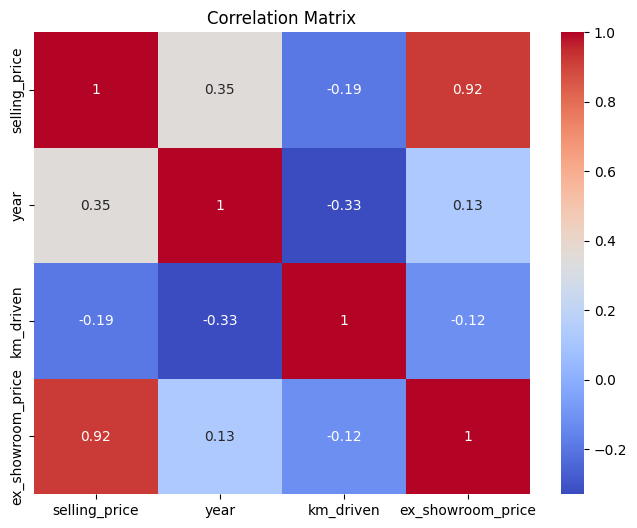

In [ ]:
numeric_df = df[['selling_price', 'year', 'km_driven', 'ex_showroom_price']].dropna()
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


**EDA-2**

In [ ]:
from google.colab import files
uploaded = files.upload()



Saving Car Sale.csv to Car Sale.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (replace with the correct uploaded file name)
df = pd.read_csv('Car Sale.csv')
df.head()


Car_id      Date Customer Name Gender  Annual Income  \
0  C_CND_000001  1/2/2022     Geraldine   Male          13500   
1  C_CND_000002  1/2/2022           Gia   Male        1480000   
2  C_CND_000003  1/2/2022        Gianna   Male        1035000   
3  C_CND_000004  1/2/2022       Giselle   Male          13500   
4  C_CND_000005  1/2/2022         Grace   Male        1465000   

                           Dealer_Name   Company       Model  \
0  Buddy Storbeck's Diesel Service Inc      Ford  Expedition   
1                     C & M Motors Inc     Dodge     Durango   
2                          Capitol KIA  Cadillac    Eldorado   
3               Chrysler of Tri-Cities    Toyota      Celica   
4                    Chrysler Plymouth     Acura          TL   

                      Engine Transmission       Color  Price ($)  Dealer_No   \
0  DoubleÂ Overhead Camshaft         Auto       Black      26000  06457-3834   
1  DoubleÂ Overhead Camshaft         Auto       Black      19000  60504-7114   
2          Overhead Camshaft       Manual         Red      31500  38701-8047   
3          Overhead Camshaft       Manual  Pale White      14000  99301-3882   
4  DoubleÂ Overhead Camshaft         Auto         Red      24500  53546-9427   

  Body Style    Phone Dealer_Region  
0        SUV  8264678    Middletown  
1        SUV  6848189        Aurora  
2  Passenger  7298798    Greenville  
3        SUV  6257557         Pasco  
4  Hatchback  7081483    Janesville

In [ ]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


Car_id           0
Date             0
Customer Name    1
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64

**Questions**

1. What is the average selling price of cars for each dealer, and how does it compare across different dealers?

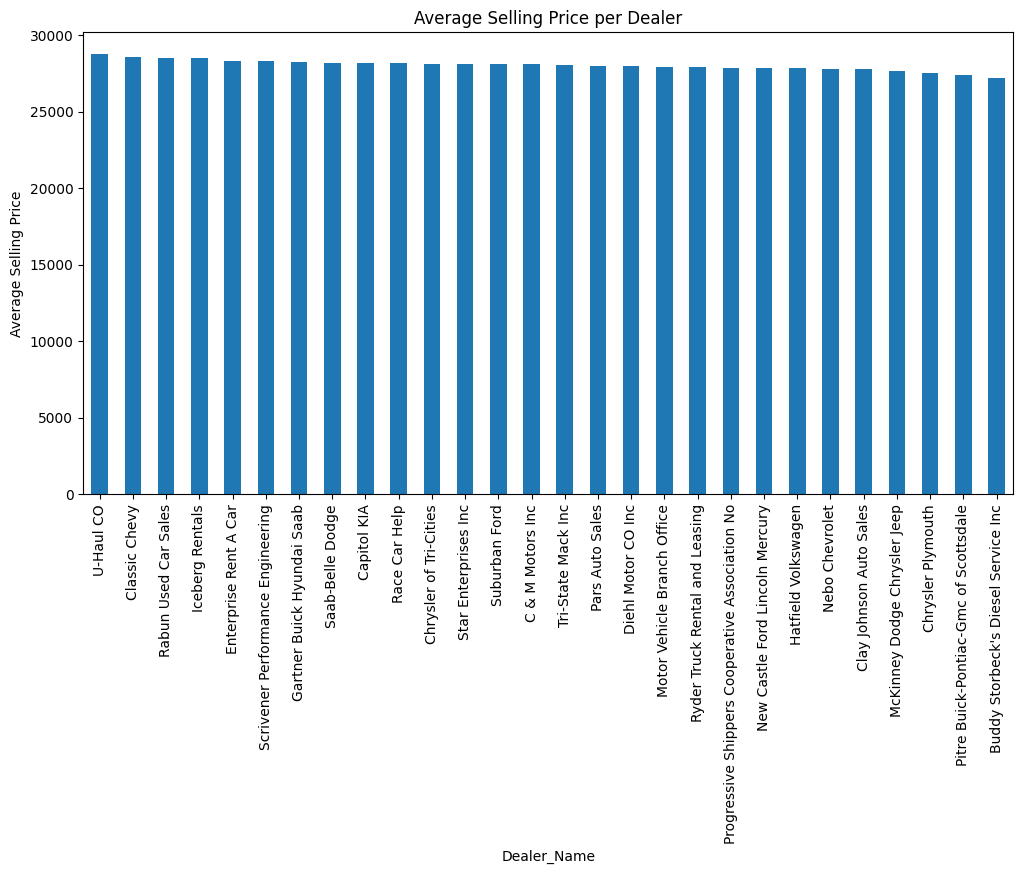

In [ ]:
dealer_avg_price = df.groupby("Dealer_Name")["Price ($)"].mean().sort_values(ascending=False)
dealer_avg_price.plot(kind="bar", figsize=(12, 6), title="Average Selling Price per Dealer")
plt.ylabel("Average Selling Price")
plt.show()


2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing
trends?

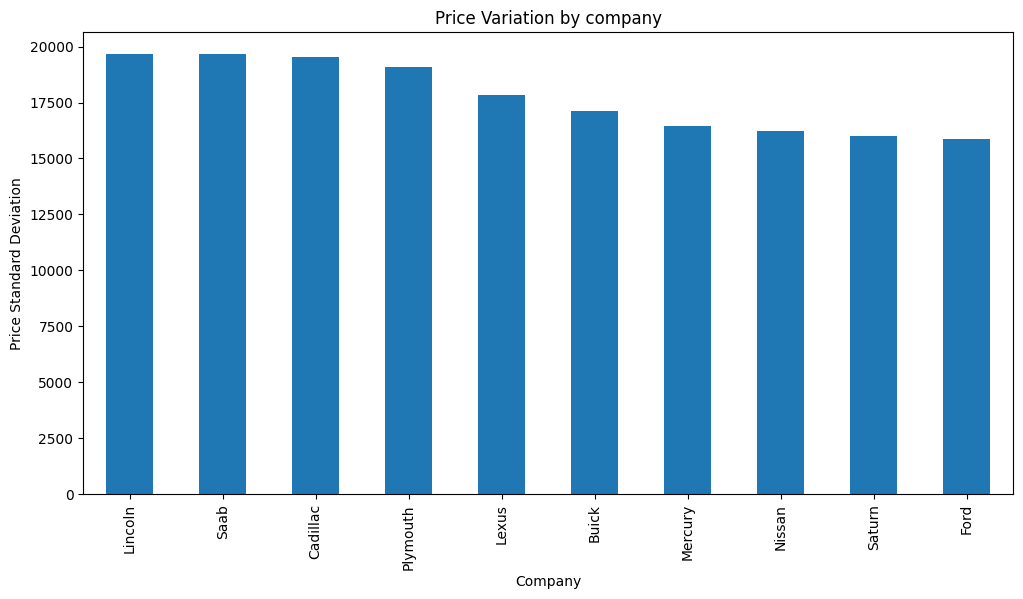

In [ ]:
brand_price_variation = df.groupby("Company")["Price ($)"].std().sort_values(ascending=False)
brand_price_variation.head(10).plot(kind="bar", figsize=(12, 6), title="Price Variation by company")
plt.ylabel("Price Standard Deviation")
plt.show()


3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges
compare?

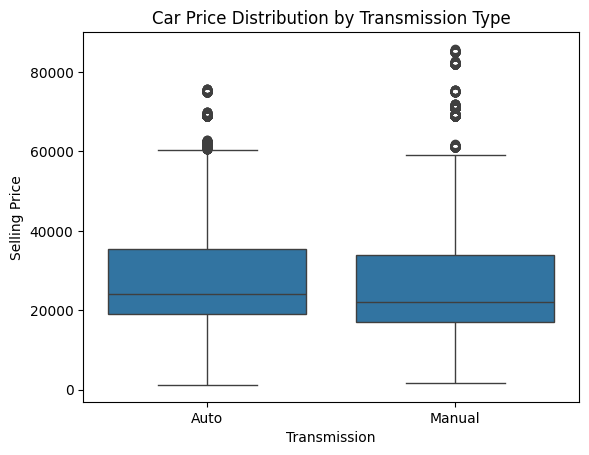

In [ ]:
sns.boxplot(x="Transmission", y="Price ($)", data=df)
plt.title("Car Price Distribution by Transmission Type")
plt.ylabel("Selling Price")
plt.show()


4. What is the distribution of car prices across different regions?

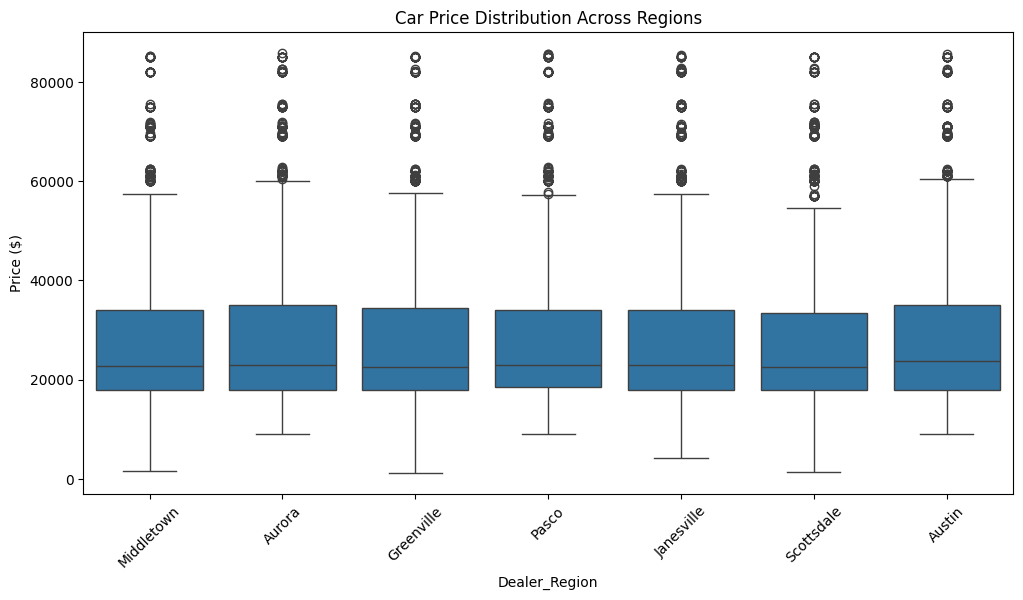

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Dealer_Region", y="Price ($)", data=df)
plt.title("Car Price Distribution Across Regions")
plt.xticks(rotation=45)
plt.show()


5. What is the distribution of cars based on body styles?

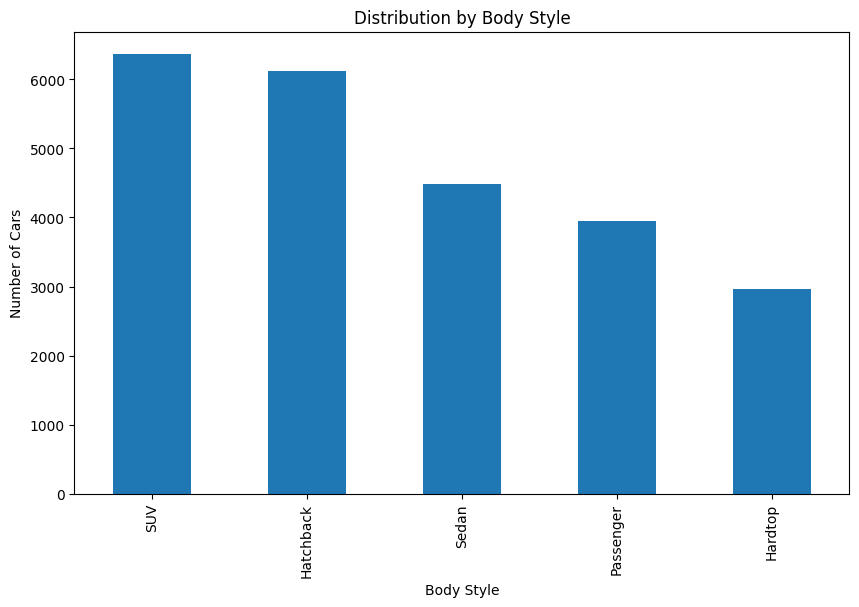

In [ ]:
df['Body Style'].value_counts().plot(kind='bar', figsize=(10, 6), title="Distribution by Body Style")
plt.ylabel("Number of Cars")
plt.show()


6. How does the average selling price of cars vary by customer gender and annual income?

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


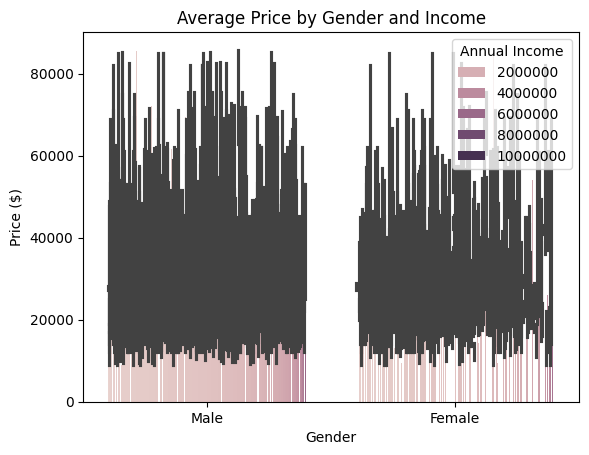

In [ ]:
sns.barplot(x="Gender", y="Price ($)", hue="Annual Income", data=df)
plt.title("Average Price by Gender and Income")
plt.show()


7. What is the distribution of car prices by region, and how does the number of cars sold vary by region?

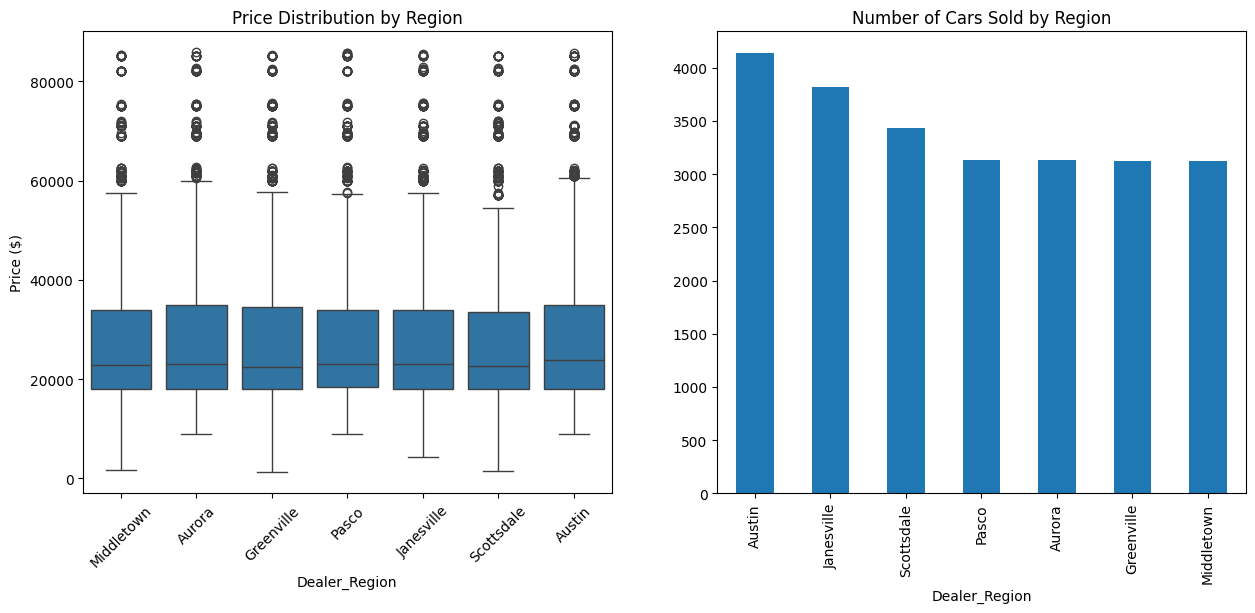

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

sns.boxplot(x="Dealer_Region", y="Price ($)", data=df, ax=ax[0])
ax[0].set_title("Price Distribution by Region")
ax[0].tick_params(axis='x', rotation=45)

df['Dealer_Region'].value_counts().plot(kind='bar', ax=ax[1])
ax[1].set_title("Number of Cars Sold by Region")
plt.show()


8. How does the average car price differ between cars with different engine sizes?

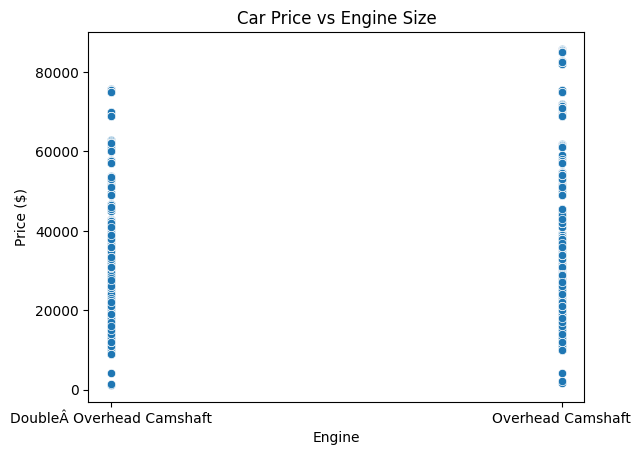

In [ ]:
sns.scatterplot(x="Engine", y="Price ($)", data=df)
plt.title("Car Price vs Engine Size")
plt.show()


9. How do car prices vary based on the customer’s annual income bracket?

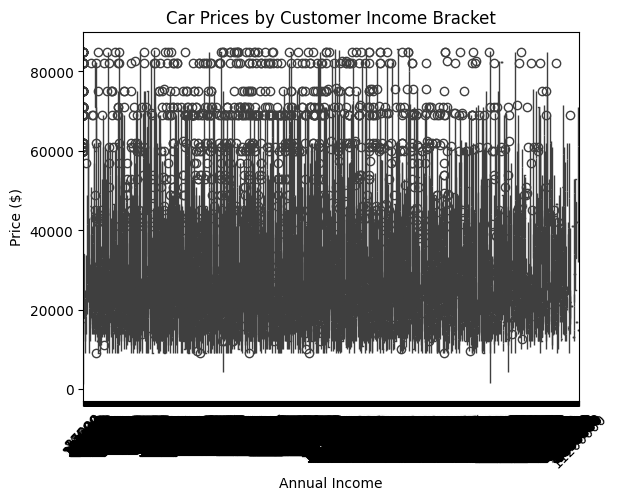

In [ ]:
sns.boxplot(x="Annual Income", y="Price ($)", data=df)
plt.title("Car Prices by Customer Income Bracket")
plt.xticks(rotation=45)
plt.show()


10. What are the top 5 car models with the highest number of sales, and how does their price distribution look?

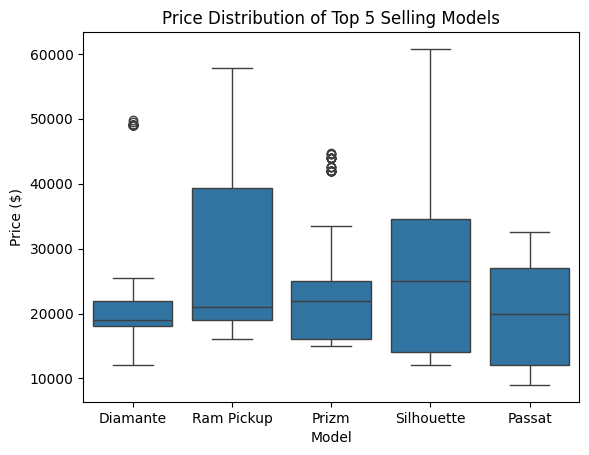

In [ ]:
top_models = df['Model'].value_counts().head(5).index
sns.boxplot(x="Model", y="Price ($)", data=df[df['Model'].isin(top_models)])
plt.title("Price Distribution of Top 5 Selling Models")
plt.show()


11. How does car price vary with engine size across different car colors, and which colors have the highest price
variation?

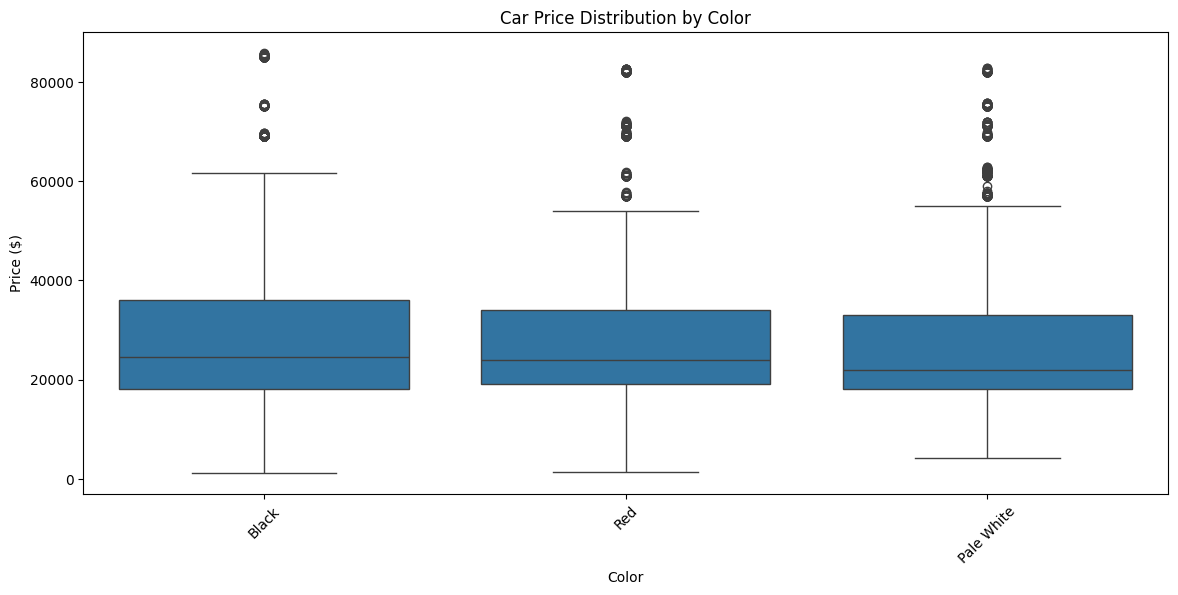

Color
Red           15519.360962
Black         15286.065976
Pale White    14077.346859
Name: Price ($), dtype: float64

In [ ]:
plt.figure(figsize=(14, 6))
sns.boxplot(x="Color", y="Price ($)", data=df)
plt.title("Car Price Distribution by Color")
plt.xticks(rotation=45)
plt.show()

# Highest variation by color
df.groupby("Color")["Price ($)"].std().sort_values(ascending=False).head()


12. Is there any seasonal trend in car sales based on the date of sale?

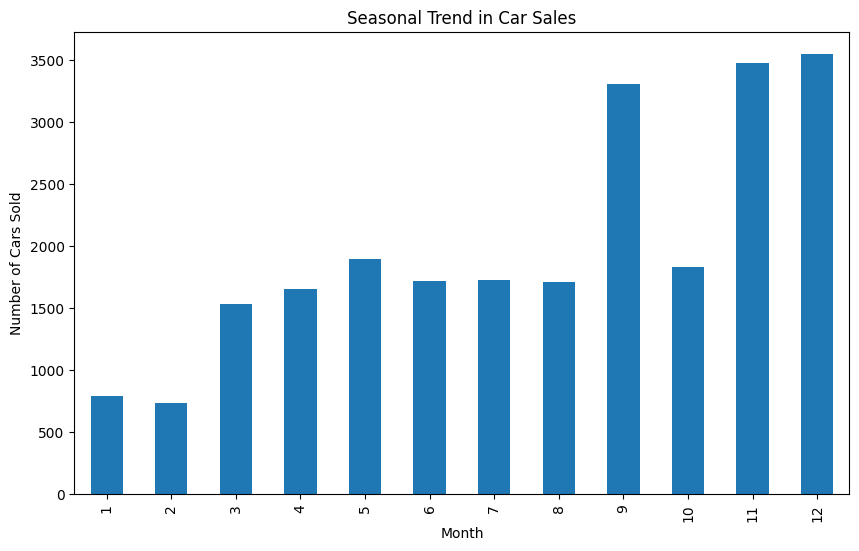

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['month'] = df['Date'].dt.month

df.groupby("month")["Price ($)"].count().plot(kind="bar", figsize=(10, 6))
plt.title("Seasonal Trend in Car Sales")
plt.ylabel("Number of Cars Sold")
plt.xlabel("Month")
plt.show()


13. How does the car price distribution change when considering different combinations of body style and
transmission type?

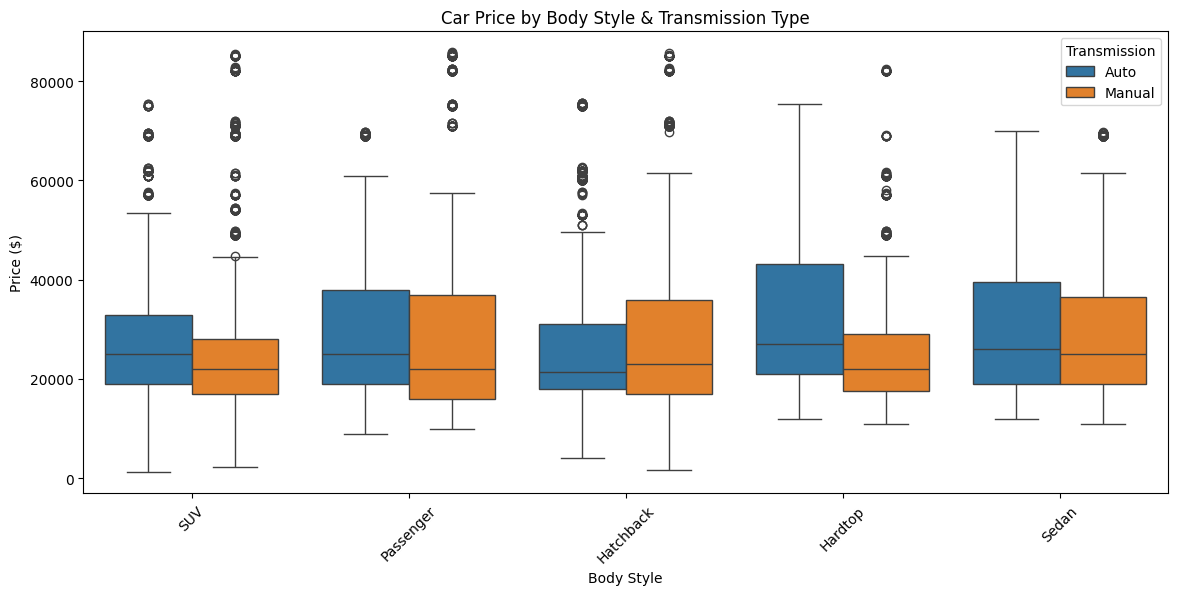

In [ ]:
plt.figure(figsize=(14, 6))
sns.boxplot(x="Body Style", y="Price ($)", hue="Transmission", data=df)
plt.title("Car Price by Body Style & Transmission Type")
plt.xticks(rotation=45)
plt.show()


14. What is the correlation between car price, engine size, and annual income of customers, and how do these
features interact?

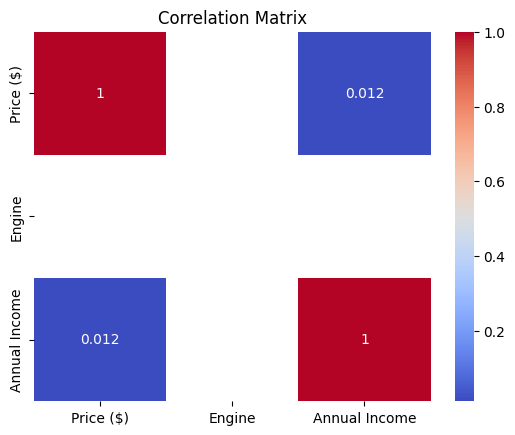

In [ ]:
# Convert 'Engine' column to numeric, handling non-numeric values
df['Engine'] = pd.to_numeric(df['Engine'], errors='coerce')
# Convert 'Annual Income' to numeric, handling non-numeric values
df['Annual Income'] = pd.to_numeric(df['Annual Income'], errors='coerce')
# Calculate the correlation matrix
corr_matrix = df[['Price ($)', 'Engine', 'Annual Income']].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

15. How does the average car price vary across different car models and engine types?

In [1]:
pivot_table = df.pivot_table(values='Price ($)', index='Model', columns='Engine', aggfunc='mean')
# Convert 'Engine' column to numeric if needed
pivot_table.columns = pd.to_numeric(pivot_table.columns, errors='coerce')
# Convert values to numeric if needed
pivot_table = pivot_table.apply(pd.to_numeric, errors='coerce')
# Filter out columns with non-numeric data
pivot_table = pivot_table.select_dtypes(include=['number'])
pivot_table.plot(kind='bar', stacked=True, figsize=(16, 6))
plt.title("Average Price by Car Model and Engine Type")
plt.ylabel("Average Selling Price")
plt.xticks(rotation=90)
plt.show()

NameError: name 'df' is not defined

**EDA-3**

In [ ]:
from google.colab import files
uploaded = files.upload()



Saving amazon.csv to amazon.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (replace with the correct uploaded file name)
df = pd.read_csv('amazon.csv')
df.head()


product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Computers&Accessories|Accessories&Peripherals|...             ₹329   
4  Computers&Accessories|Accessories&Peripherals|...             ₹154   

  actual_price discount_percentage rating rating_count  \
0       ₹1,099                 64%    4.2       24,269   
1         ₹349                 43%    4.0       43,994   
2       ₹1,899                 90%    3.9        7,928   
3         ₹699                 53%    4.2       94,363   
4         ₹399                 61%    4.2       16,905   

                                       about_product  \
0  High Compatibility : Compatible With iPhone 12...   
1  Compatible with all Type C enabled devices, be...   
2  【 Fast Charger& Data Sync】-With built-in safet...   
3  The boAt Deuce USB 300 2 in 1 cable is compati...   
4  [CHARGE & SYNC FUNCTION]- This cable comes wit...   

                                             user_id  \
0  AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...   
1  AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...   
2  AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...   
3  AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...   
4  AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...   

                                           user_name  \
0  Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...   
1  ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...   
2  Kunal,Himanshu,viswanath,sai niharka,saqib mal...   
3  Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...   
4  rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...   

                                           review_id  \
0  R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...   
1  RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...   
2  R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...   
3  R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...   
4  R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...   

                                        review_title  \
0  Satisfied,Charging is really fast,Value for mo...   
1  A Good Braided Cable for Your Type C Device,Go...   
2  Good speed for earlier versions,Good Product,W...   
3  Good product,Good one,Nice,Really nice product...   
4  As good as original,Decent,Good one for second...   

                                      review_content  \
0  Looks durable Charging is fine tooNo complains...   
1  I ordered this cable to connect my phone to An...   
2  Not quite durable and sturdy,https://m.media-a...   
3  Good product,long wire,Charges good,Nice,I bou...   
4  Bought this instead of original apple, does th...   

                                            img_link  \
0  https://m.media-amazon.com/images/W/WEBP_40237...   
1  https://m.media-amazon.com/images/W/WEBP_40237...   
2  https://m.media-amazon.com/images/W/WEBP_40237...   
3  https://m.media-amazon.com/images/I/41V5FtEWPk...   
4  https://m.media-amazon.com/images/W/WEBP_40237...   

                                        product_link  
0  https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...  
1  https://www.amazon.in/Ambrane-Unbreakable-Char...  
2  https://www.amazon.in/Sounce-iPhone-Charging-C...  
3  https://www.amazon.in/Deuce-300-Resistant-Tang...  
4  https://www.amazon.in/Portronics-Konnect-POR-1...

In [ ]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

**Questions**

1. What is the average rating for each product category?

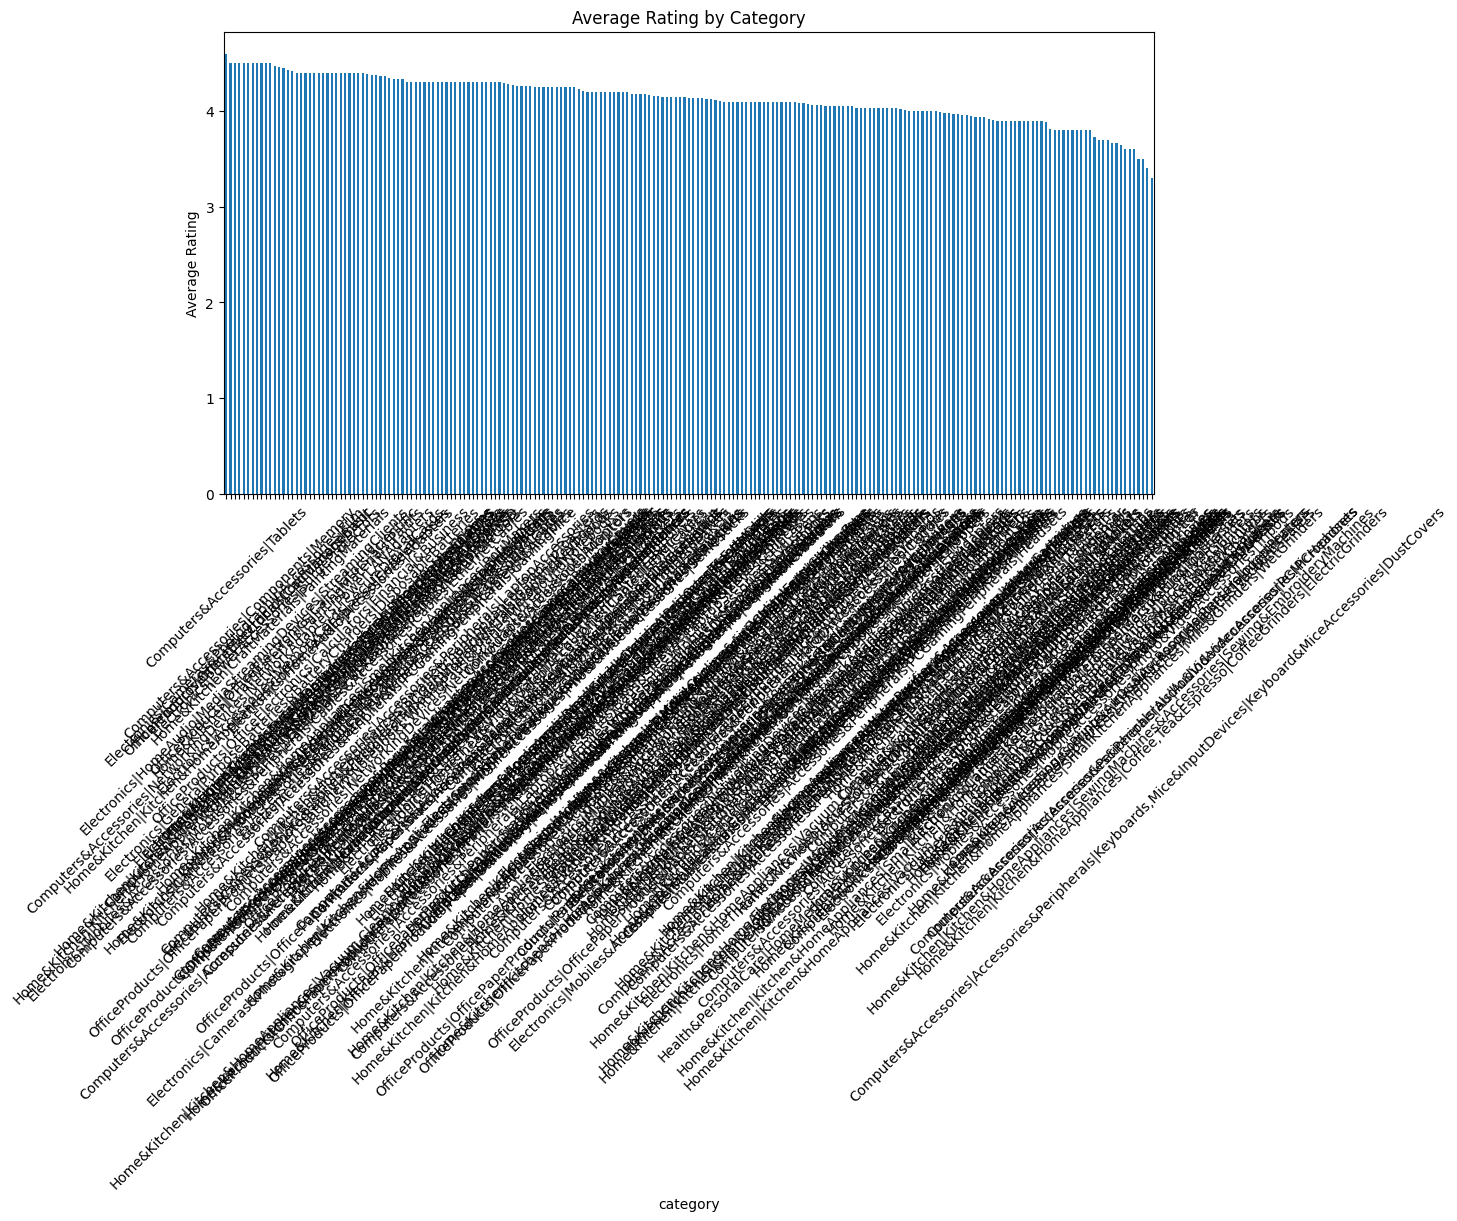

In [ ]:
# Convert the 'rating' column to numeric before calculating the mean.
# Any errors during conversion will be replaced by NaN (Not a Number)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

avg_rating = df.groupby('category')['rating'].mean().sort_values(ascending=False)
avg_rating.plot(kind='bar', figsize=(12, 6), title='Average Rating by Category')
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.show()

2. What are the top rating_count products by category?

In [ ]:
top_rated = df.sort_values("rating_count", ascending=False).groupby("category").head(1)
top_rated[['category', 'product_name', 'rating_count']]


category  \
1279  Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...   
750   Electronics|GeneralPurposeBatteries&BatteryCha...   
977   Electronics|Headphones,Earbuds&Accessories|Hea...   
1059  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...   
151   Computers&Accessories|Accessories&Peripherals|...   
...                                                 ...   
895   Home&Kitchen|CraftMaterials|DrawingMaterials|D...   
941   Computers&Accessories|Printers,Inks&Accessorie...   
526   Electronics|Mobiles&Accessories|MobileAccessor...   
1157  Car&Motorbike|CarAccessories|InteriorAccessori...   
1399  Home&Kitchen|Kitchen&HomeAppliances|Coffee,Tea...   

                                           product_name rating_count  
1279  Eureka Forbes car Vac 100 Watts Powerful Sucti...          992  
750        Eveready Red 1012 AAA Batteries - Pack of 10          989  
977   Sennheiser CX 80S in-Ear Wired Headphones with...       98,250  
1059  Pigeon 1.5 litre Hot Kettle and Stainless Stee...          976  
151   Zoul USB Type C Fast Charging 3A Nylon Braided...          974  
...                                                 ...          ...  
895   Classmate Octane Colour Burst-Multicolour Gel ...       10,718  
941   RC PRINT GI 790 Ink Refill for Canon G1000, G1...        1,367  
526   WeCool B1 Mobile Holder for Bikes or Bike Mobi...        1,193  
1157  Reffair AX30 [MAX] Portable Air Purifier for C...        1,118  
1399  Cafe JEI French Press Coffee and Tea Maker 600...        1,065  

[211 rows x 3 columns]

3. What is the distribution of discounted prices vs. actual prices?

<ipython-input-45-40997aafd300>:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df['actual_price'], label='Actual Price', fill=True)
<ipython-input-45-40997aafd300>:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df['discounted_price'], label='Discounted Price', fill=True)
<ipython-input-45-40997aafd300>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


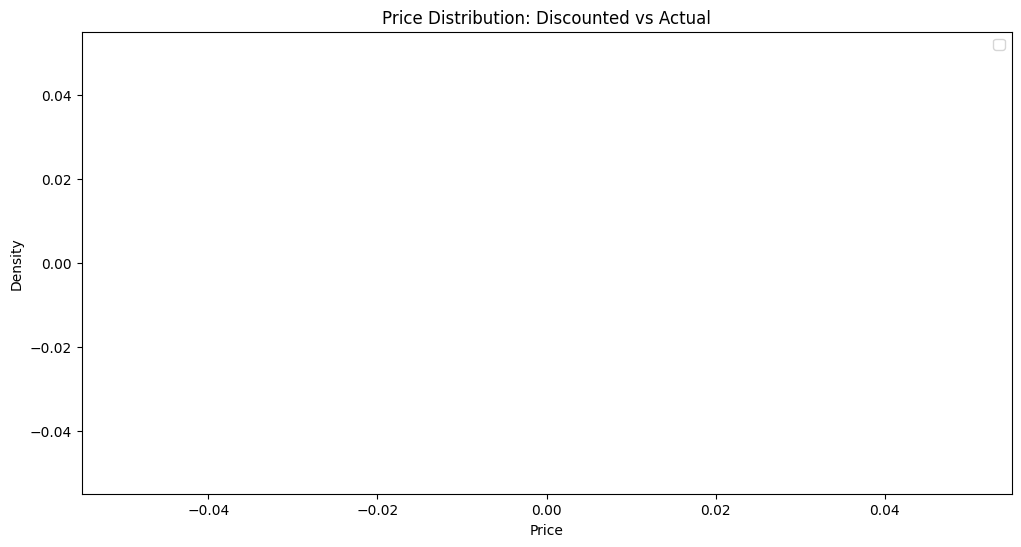

In [ ]:
# Convert 'actual_price' and 'discounted_price' to numeric
df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')

plt.figure(figsize=(12, 6))
sns.kdeplot(df['actual_price'], label='Actual Price', fill=True)
sns.kdeplot(df['discounted_price'], label='Discounted Price', fill=True)
plt.legend()
plt.title("Price Distribution: Discounted vs Actual")
plt.xlabel("Price")
plt.show()

4. How does the average discount percentage vary across categories?

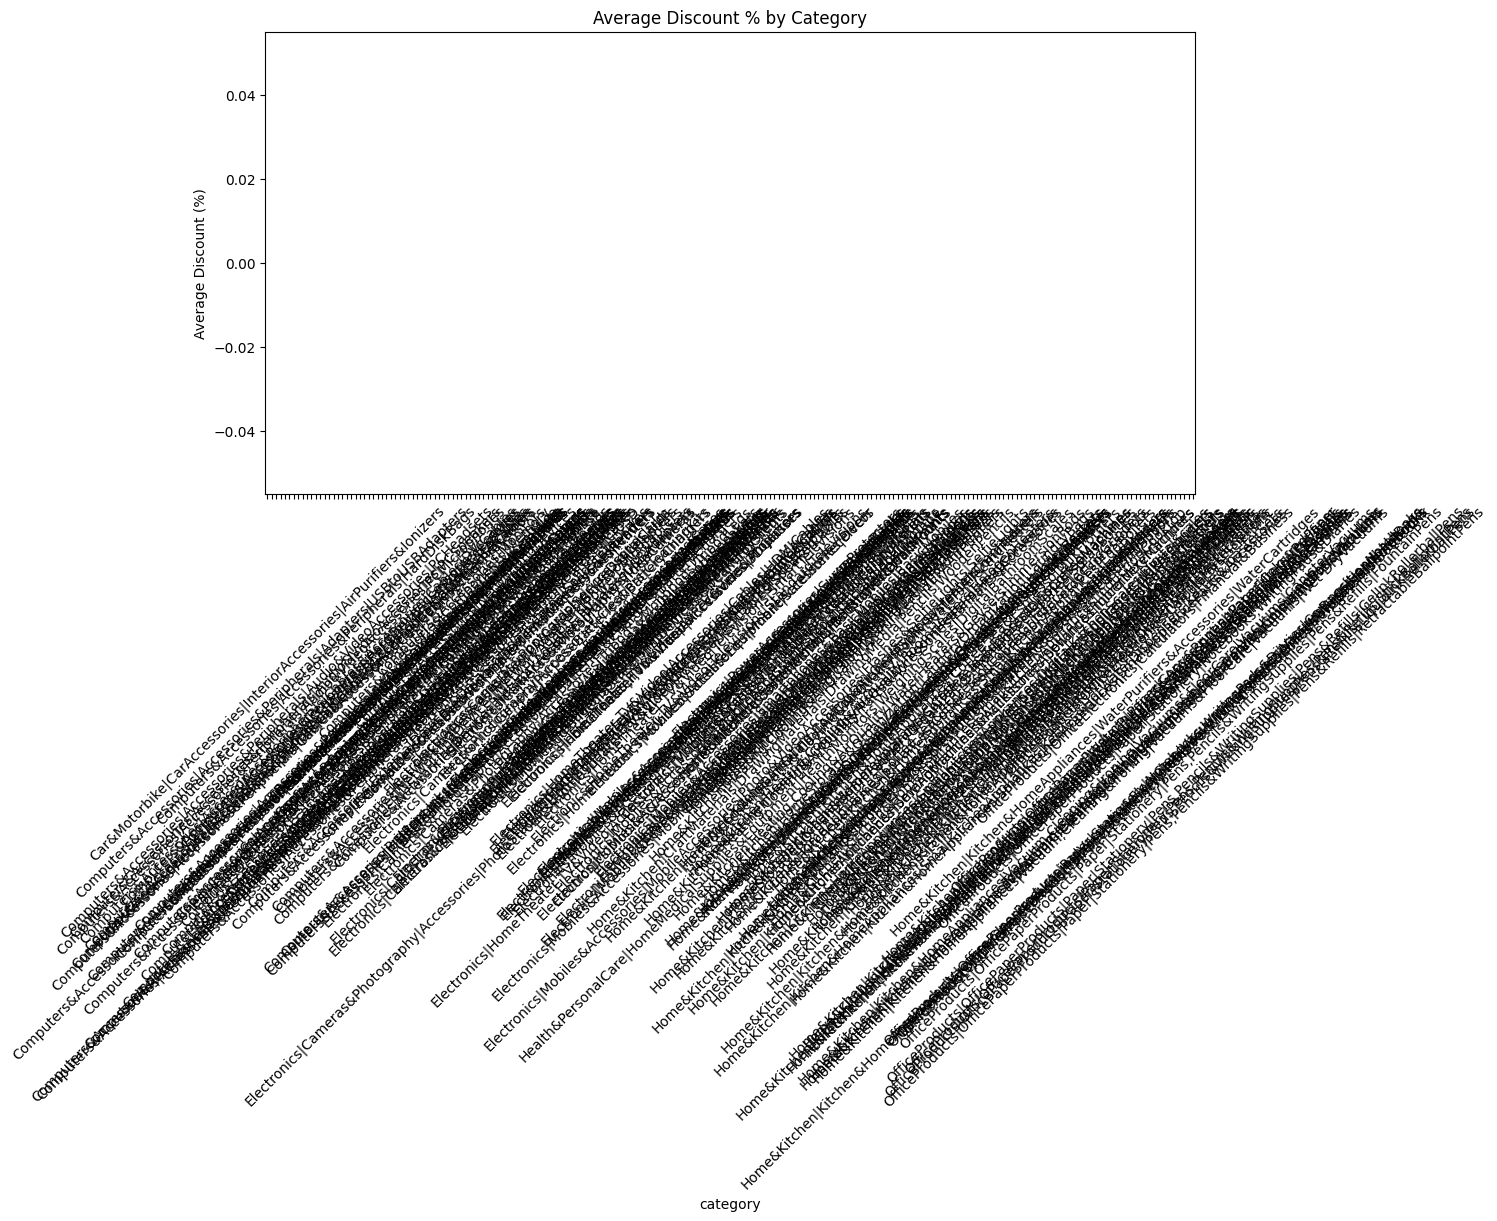

In [ ]:
# Convert 'actual_price' and 'discounted_price' to numeric
df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')
# Calculate discount percentage, removing '%' and converting to numeric
df['discount_percentage'] = ((df['actual_price'] - df['discounted_price']) / df['actual_price']) * 100

# Ensure 'discount_percentage' is numeric
df['discount_percentage'] = pd.to_numeric(df['discount_percentage'], errors='coerce')

avg_discount = df.groupby('category')['discount_percentage'].mean().sort_values(ascending=False)

avg_discount.plot(kind='bar', figsize=(12, 6), title="Average Discount % by Category", color='green')
plt.ylabel("Average Discount (%)")
plt.xticks(rotation=45)
plt.show()

5. What are the most popular product names?

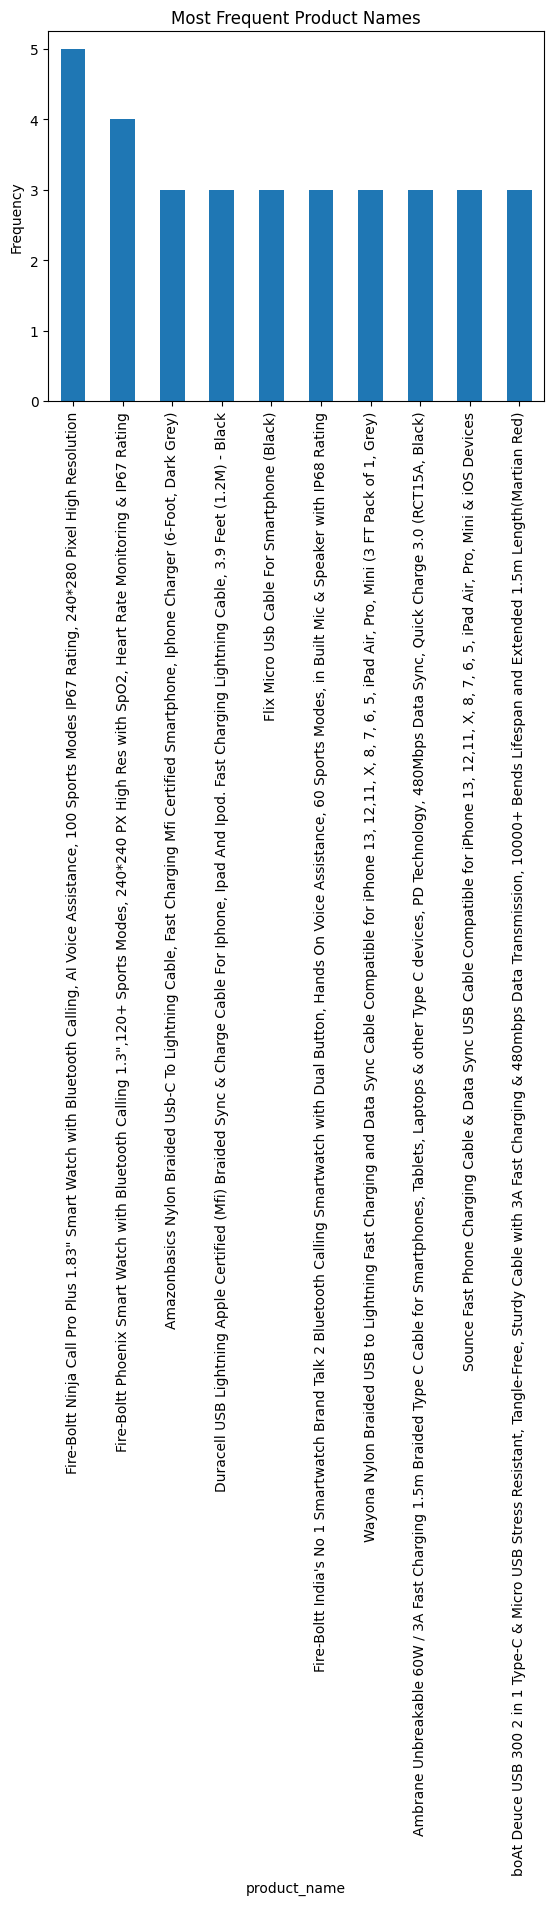

In [ ]:
df['product_name'].value_counts().head(10).plot(kind='bar', title="Most Frequent Product Names")
plt.ylabel("Frequency")
plt.show()


6. What are the most popular product keywords?

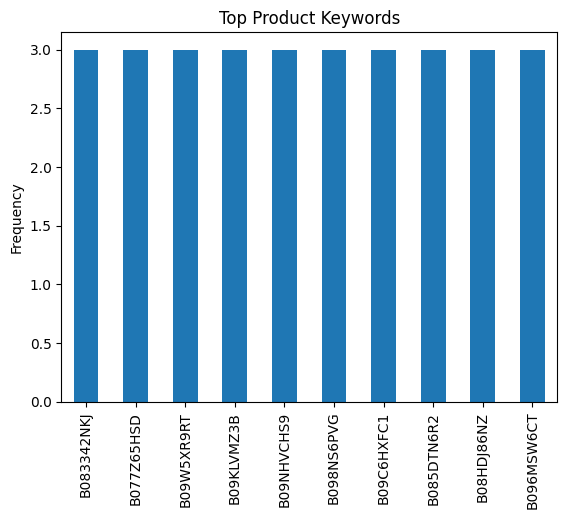

In [ ]:
from collections import Counter

keywords = df['product_id'].dropna().str.split(',').explode()
keyword_counts = Counter(keywords)
top_keywords = pd.Series(keyword_counts).sort_values(ascending=False).head(10)

top_keywords.plot(kind='bar', title="Top Product Keywords")
plt.ylabel("Frequency")
plt.show()


7. What are the most popular product reviews?

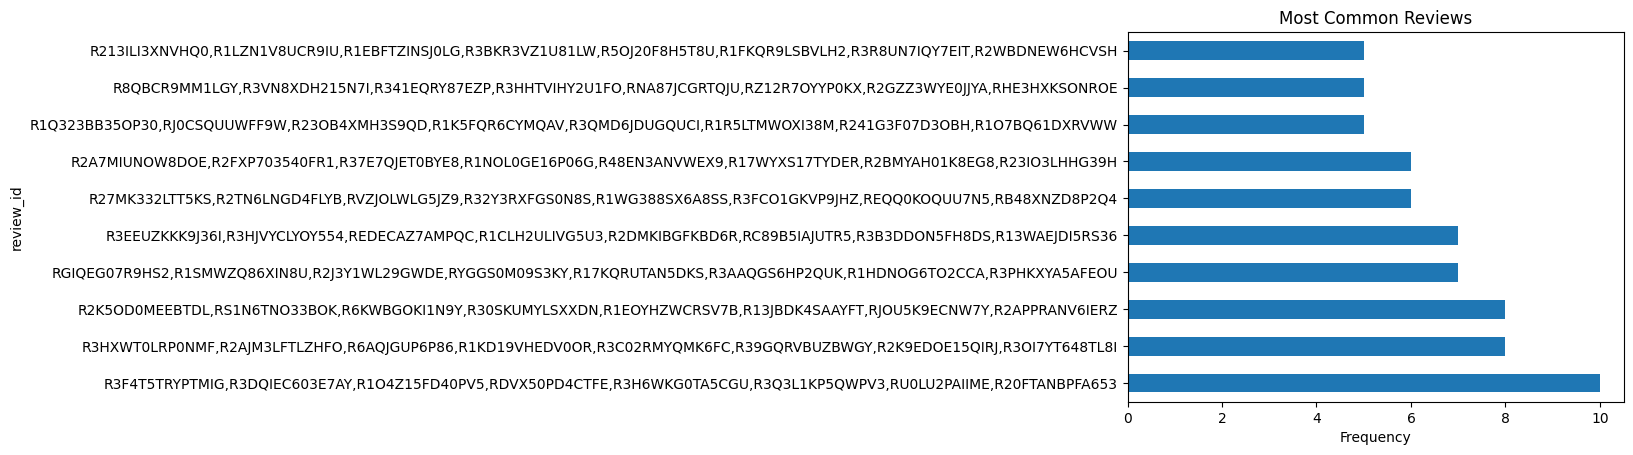

In [ ]:
df['review_id'].value_counts().head(10).plot(kind='barh', title="Most Common Reviews")
plt.xlabel("Frequency")
plt.show()


8. What is the correlation between discounted_price and rating?

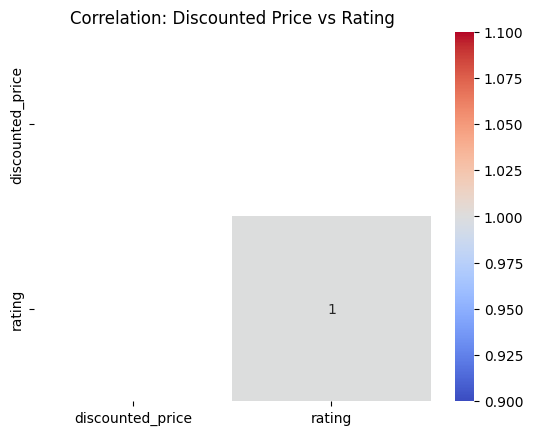

In [ ]:
corr = df[['discounted_price', 'rating']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation: Discounted Price vs Rating")
plt.show()


9.  What are the Top 5 categories based on the highest ratings?

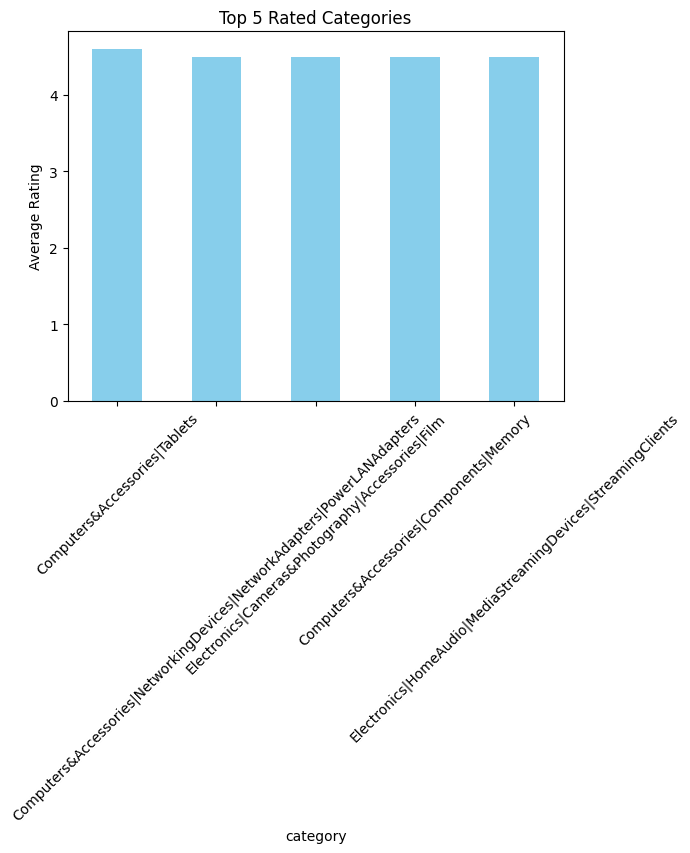

In [ ]:
top_categories = avg_rating.head(5)
top_categories.plot(kind='bar', color='skyblue', title="Top 5 Rated Categories")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.show()


10. Identify any potential areas for improvement or optimization based on the data analysis.

##  Recommendations Based on Data Analysis

- **Focus on High-Rated Categories**: The top-rated categories should be prioritized in promotions and stocking strategies.
- **Improve Products with Low Ratings but High Visibility**: Products that show up frequently but have low ratings may need quality checks or better descriptions.
- **Optimize Discounts**: Categories with very low discounts might benefit from targeted promotions to drive more sales.
- **Keyword Optimization**: Use top-performing keywords more consistently across product listings to boost search visibility.
- **Streamline Product Reviews**: Address repetitive or negative reviews with better customer service or improved product quality.


**EDA-4**

In [ ]:
from google.colab import files
uploaded = files.upload()



Saving spotify.csv to spotify.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (replace with the correct uploaded file name)
df = pd.read_csv('spotify.csv')
df.head()


Artist                               Track Name  Popularity  Duration (ms)  \
0  Drake  Rich Baby Daddy (feat. Sexyy Red & SZA)          92         319191   
1  Drake                                One Dance          91         173986   
2  Drake                       IDGAF (feat. Yeat)          90         260111   
3  Drake     First Person Shooter (feat. J. Cole)          88         247444   
4  Drake            Jimmy Cooks (feat. 21 Savage)          88         218364   

                 Track ID  
0  1yeB8MUNeLo9Ek1UEpsyz6  
1  1zi7xx7UVEFkmKfv06H8x0  
2  2YSzYUF3jWqb9YP9VXmpjE  
3  7aqfrAY2p9BUSiupwk3svU  
4  3F5CgOj3wFlRv51JsHbxhe

In [ ]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB


Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

**Questions**

1. Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do
the needful.

In [ ]:
# Check for null values
print("Null values per column:")
print(df.isnull().sum())

# Handle nulls (if any)
df = df.dropna()  # Alternatively: fillna() based on context

# Check and remove duplicate rows
df = df.drop_duplicates()

# Confirm cleanup
print("Cleaned DataFrame shape:", df.shape)


Null values per column:
Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64
Cleaned DataFrame shape: (413, 5)


2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.

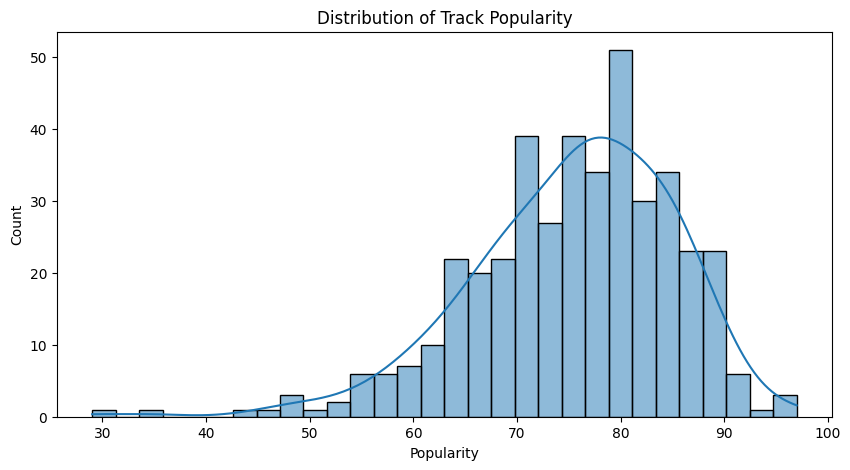

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Popularity'], bins=30, kde=True)
plt.title("Distribution of Track Popularity")
plt.xlabel("Popularity")
plt.ylabel("Count")
plt.show()


3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.

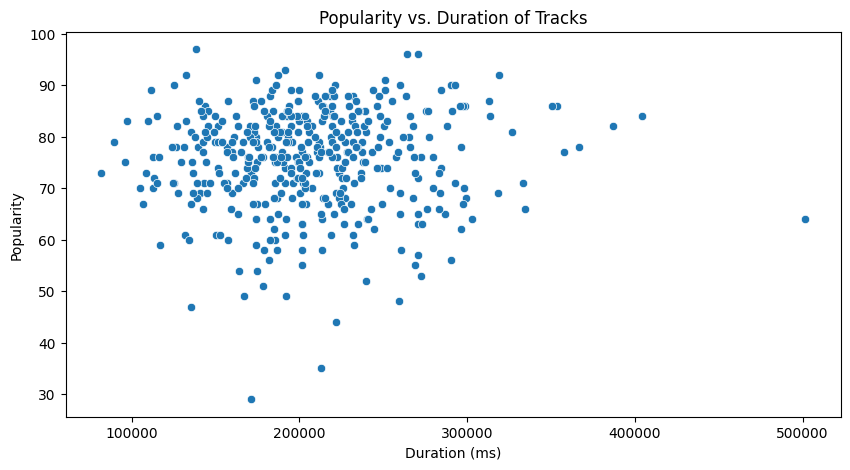

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Duration (ms)', y='Popularity', data=df)
plt.title("Popularity vs. Duration of Tracks")
plt.xlabel("Duration (ms)")
plt.ylabel("Popularity")
plt.show()


4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using
a countplot.

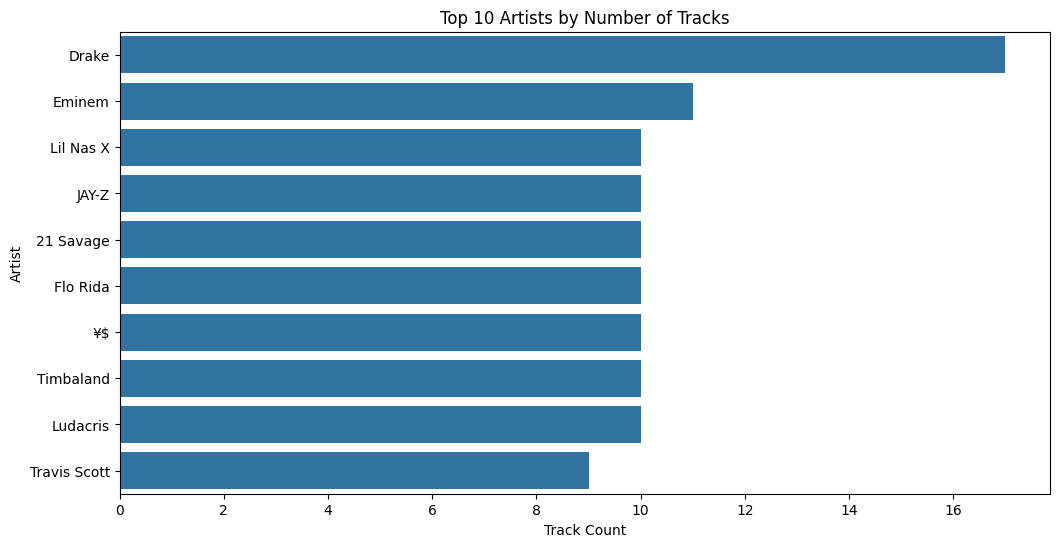

In [ ]:
plt.figure(figsize=(12, 6))
top_artists = df['Artist'].value_counts().head(10)
sns.countplot(y='Artist', data=df[df['Artist'].isin(top_artists.index)],
              order=top_artists.index)
plt.title("Top 10 Artists by Number of Tracks")
plt.xlabel("Track Count")
plt.ylabel("Artist")
plt.show()


5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.

In [ ]:
least_popular_tracks = df.sort_values(by='Popularity', ascending=True).head(5)
least_popular_tracks[['Artist', 'Track Name', 'Popularity']]


Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48

6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and
display the average popularity for each artist.

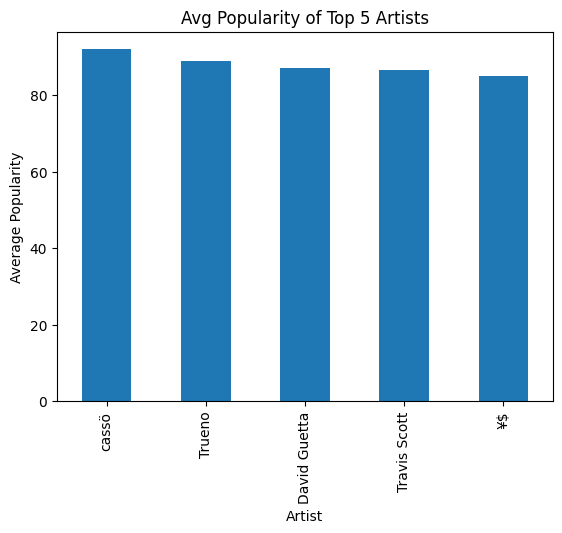

In [ ]:
top_artists_by_popularity = df.groupby('Artist')['Popularity'].mean().sort_values(ascending=False).head(5)
top_artists_by_popularity.plot(kind='bar', title="Avg Popularity of Top 5 Artists")
plt.ylabel("Average Popularity")
plt.show()


7.  For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.

In [ ]:
top5_artists = top_artists_by_popularity.index

for artist in top5_artists:
    top_track = df[df['Artist'] == artist].sort_values(by='Popularity', ascending=False).iloc[0]
    print(f"🎵 {artist} - {top_track['Track Name']} (Popularity: {top_track['Popularity']})")


🎵 cassö - Prada (Popularity: 92)
🎵 Trueno - Mamichula - con Nicki Nicole (Popularity: 89)
🎵 David Guetta - Baby Don't Hurt Me (Popularity: 87)
🎵 Travis Scott - FE!N (feat. Playboi Carti) (Popularity: 93)
🎵 ¥$ - CARNIVAL (Popularity: 96)


8. Visualize relationships between multiple numerical variables simultaneously using a pair plot.

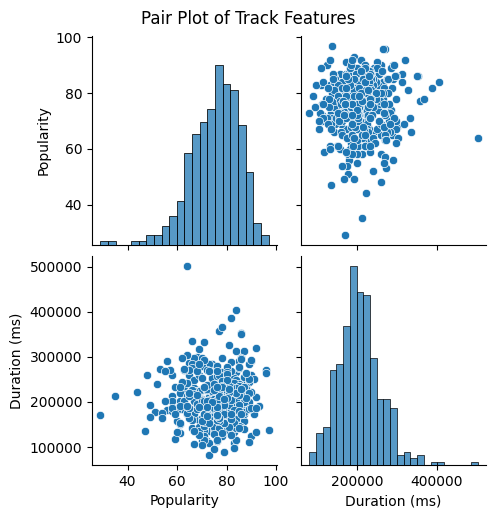

In [ ]:
sns.pairplot(df[['Popularity', 'Duration (ms)']])
plt.suptitle("Pair Plot of Track Features", y=1.02)
plt.show()


9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or
violin plot.

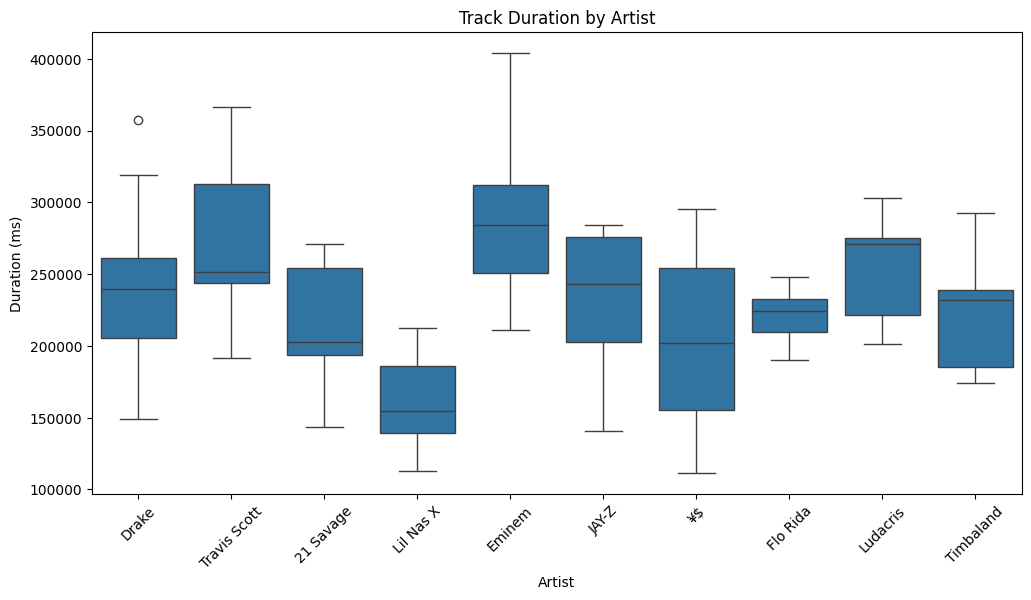

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Artist', y='Duration (ms)', data=df[df['Artist'].isin(top_artists.index)])
plt.xticks(rotation=45)
plt.title("Track Duration by Artist")
plt.ylabel("Duration (ms)")
plt.show()


10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a
violin plot.

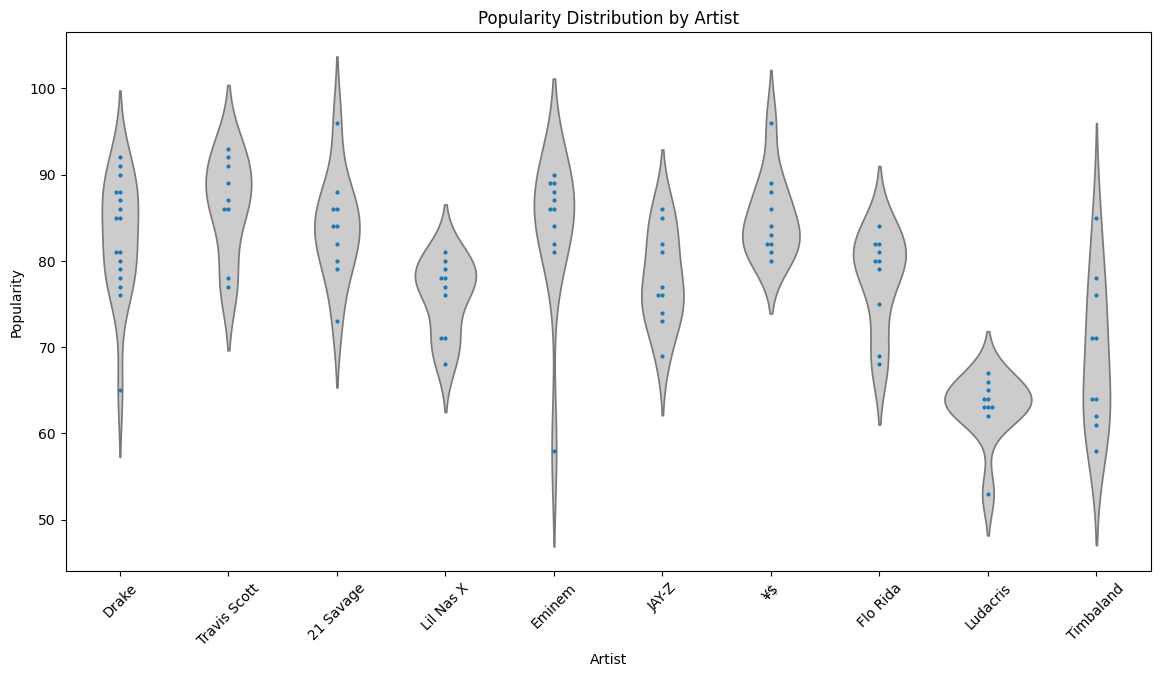

In [ ]:
plt.figure(figsize=(14, 7))
sns.violinplot(x='Artist', y='Popularity', data=df[df['Artist'].isin(top_artists.index)], inner=None, color=".8")
sns.swarmplot(x='Artist', y='Popularity', data=df[df['Artist'].isin(top_artists.index)], size=3)
plt.title("Popularity Distribution by Artist")
plt.xticks(rotation=45)
plt.show()
